# Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set()

## Importing data using Pandas

The data from _Groene Mient_ comes inside an excel file which consists of two different sheets (_Productie_ and _Consumptie_)

In [2]:
file_name = '../dwelling2/Data/dataGM_excel2.xlsx'

df_deli = pd.read_excel(file_name, sheet_name='Productie')
df_cons = pd.read_excel(file_name, sheet_name='Consumptie')

display(df_deli.head())
display(df_cons.head())

,ID-nummer,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H24,H25,H26,H27,H28,H29,H30,H31,H32,H33
0,concept,E,E,WP,WP,WP,E,E,E,E,...,WP,Zon,WP,WP,Zon,E,E,WP,Zon,WP
1,PV-aantal,17,14,9,11,12,14,13,9,14,...,11,13,12,9,13,14,14,15,12,10
2,personen,4,2,4,1,4,4,2,4,1,...,2,2,2,3,2,1,4,2,4,1
3,Datum-tijd tot,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,...,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh,Productie kWh
4,2017-07-11 00:15:00,0,0,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ID-nummer,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H24,H25,H26,H27,H28,H29,H30,H31,H32,H33
0,concept,E,E,WP,WP,WP,E,E,E,E,...,WP,Zon,WP,WP,Zon,E,E,WP,Zon,WP
1,PV-aantal,17,14,9,11,12,14,13,9,14,...,11,13,12,9,13,14,14,15,12,10
2,personen,4,2,4,1,4,4,2,4,1,...,2,2,2,3,2,1,4,2,4,1
3,Datum-tijd tot,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,...,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh,Consumptie kWh
4,2017-07-11 00:15:00,0.038,0.039,0.044,0.024,NaN,0.039,0.025,0.006,0.294,...,0.053,0.018,0.076,0.07,0.036,0.014,0.044,0.416,0.023,0.053


We can already make few observations here by looking at the head of the data:
1. Concept, PV-aantal, and personen are redundant since they appear in both datasets.
2. In both datasets there are missing values, which need to be handled.
3. Since these datasets contain time series data, we will rename the first column to _timestamp_ and set it as index.

## Splitting datasets

We will split below the datasets in order to delete the redundant information. It will result in three different datasets:
* **df_info:** Contains the heating syetem type, number of people living and number of solar panels installed on each dwelling.
* **df_deli:** Contains the energy delivery of each dwelling measured by the smart meter every 15 minutes.
* **df_cons:** Contains the energy consumption of each dwelling measured by the smart meter  every 15 minutes.

We will also rename their indexes.

In [3]:
df_info = df_deli.iloc[:3]
df_info.set_index('ID-nummer', inplace=True)
df_info.index.names = ['feature']

df_deli = df_deli.iloc[4:]
df_deli.set_index('ID-nummer', inplace=True)
df_deli.index.names = ['timestamp']

df_cons = df_cons.iloc[4:]
df_cons.set_index('ID-nummer', inplace=True)
df_cons.index.names = ['timestamp']

In [4]:
display(df_deli.index[0])
display(df_deli.index[0-1])

Timestamp('2017-07-11 00:15:00')

Timestamp('2019-06-01 00:00:00')

As we can see, we have almost 2 years of data. Let's check now how much data is null.

In [5]:
display(df_deli.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66240 entries, 2017-07-11 00:15:00 to 2019-06-01 00:00:00
Data columns (total 33 columns):
H01    64356 non-null object
H02    64083 non-null object
H03    64140 non-null object
H04    64092 non-null object
H05    55611 non-null object
H06    64168 non-null object
H07    64079 non-null object
H08    64611 non-null object
H09    64179 non-null object
H10    47910 non-null object
H11    59488 non-null object
H12    64263 non-null object
H13    64225 non-null object
H14    50432 non-null object
H15    64029 non-null object
H16    64116 non-null object
H17    64348 non-null object
H18    64097 non-null object
H19    61478 non-null object
H20    64145 non-null object
H21    64179 non-null object
H22    63599 non-null object
H23    64272 non-null object
H24    64530 non-null object
H25    64450 non-null object
H26    64449 non-null object
H27    58387 non-null object
H28    64435 non-null object
H29    63984 non-null object
H30    49593 no

None

In [6]:
display(df_cons.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66240 entries, 2017-07-11 00:15:00 to 2019-06-01 00:00:00
Data columns (total 33 columns):
H01    64356 non-null object
H02    64083 non-null object
H03    64140 non-null object
H04    64092 non-null object
H05    55611 non-null object
H06    64168 non-null object
H07    64079 non-null object
H08    64611 non-null object
H09    64179 non-null object
H10    47910 non-null object
H11    59858 non-null object
H12    64263 non-null object
H13    64225 non-null object
H14    50433 non-null object
H15    64029 non-null object
H16    64116 non-null object
H17    64348 non-null object
H18    64097 non-null object
H19    61478 non-null object
H20    64145 non-null object
H21    64179 non-null object
H22    63599 non-null object
H23    64272 non-null object
H24    64530 non-null object
H25    64450 non-null object
H26    64449 non-null object
H27    58387 non-null object
H28    64435 non-null object
H29    63984 non-null object
H30    49593 no

None

We can extend our observations on missing data and the datatypes here:
* Every house has missing data, probably the smart meter malfunctioned.
* There are some houses (H05, H10, H11, H14, H27 and H30) which have quite less data than the others because the smart meters were not installed at the same time.
* Every feature is an object, we will convert *df_deli* and *df_cons* to float.

In [7]:
df_deli = df_deli.astype('float')
df_cons = df_cons.astype('float')

## Exploring one single dwelling

Once we have the datasest ready to work with them, let's plot the data from one house to see how it looks like. For that purpose, we will create a dataframe with two columns (energy delivery and energy consumption).

In [8]:
# Dataframe which contains the first house
df_house_1 = pd.DataFrame(columns=['deli', 'cons'], index=df_deli.index)
df_house_1['deli'] = df_deli['H01']
df_house_1['cons'] = df_cons['H01']

display(df_house_1.head(2))

,deli,cons
timestamp,,
2017-07-11 00:15:00,0.0,0.038
2017-07-11 00:30:00,0.0,0.018


### Handling outliers

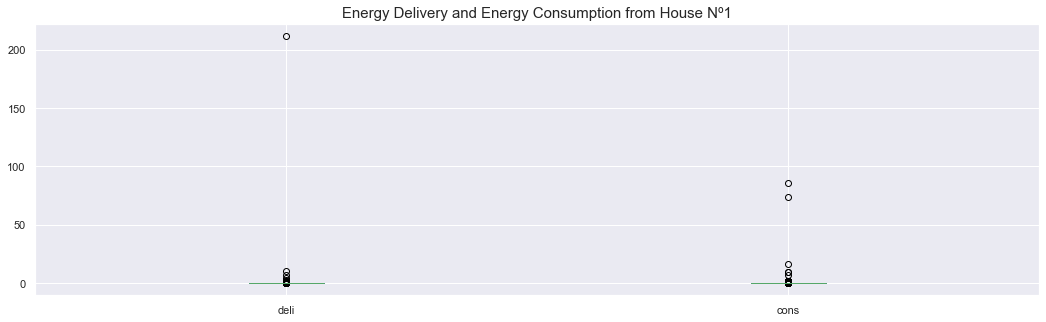

In [9]:
df_house_1.plot.box(figsize=(18,5))
plt.title("Energy Delivery and Energy Consumption from House Nº1", fontsize=15)
plt.show()

We can clearly see that there are outliers in both columns (_deli_ and _cons_). Let's take a look at one entry in our data.

In [10]:
df_house_1[df_house_1['deli'] > 200]

,deli,cons
timestamp,,
2018-05-03,211.751,85.744


As we already know that the smart meter might malfunctions, let's take a look to the previous values.

In [11]:
df_house_1['2018-05-02 23:00':'2018-05-03 00:00']

,deli,cons
timestamp,,
2018-05-02 23:00:00,NaN,NaN
2018-05-02 23:15:00,NaN,NaN
2018-05-02 23:30:00,NaN,NaN
2018-05-02 23:45:00,NaN,NaN
2018-05-03 00:00:00,211.751,85.744


Taking a look to the previous values, we can clearly see that the smart meter sopped working at some point and, when it started working again, it summed up all the previuos values which are not in the dataset (NaN), resulting in a outlier.

### Proving outliers

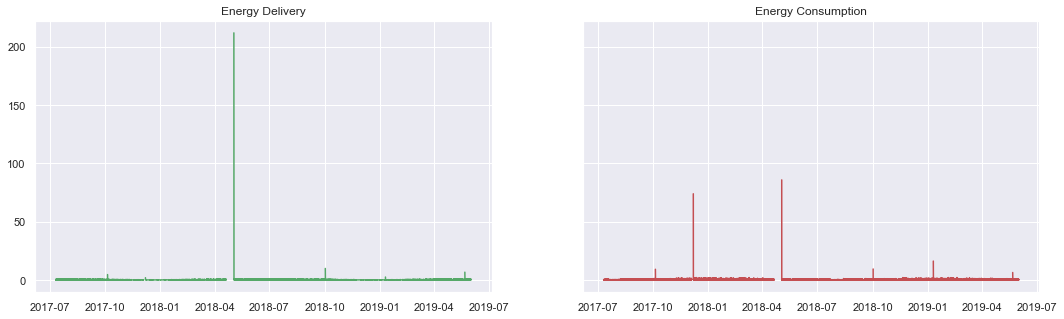

In [12]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18,5))
axs[0].plot(df_house_1['deli'], color='g')
axs[1].plot(df_house_1['cons'], color='r')

axs[0].set_title("Energy Delivery")
axs[1].set_title("Energy Consumption")

plt.show()

These two plots proves that the outliers in our dataset were compute because of a mulfunction of the smart meter.

### Exporting the datasets

Now that we have splitted the datasets, we will export them to be used in the following steps.

In [13]:
df_deli.to_csv('Data/Data Exploration/delivery.csv')
df_cons.to_csv('Data/Data Exploration/consumption.csv')
df_info.to_csv('Data/Data Exploration/houses_info.csv')